## 48k_DE_load1_segment4096_overlap0_TFDFeature

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# 設定隨機種子
SEED = 42
np.random.seed(SEED)
df = pd.read_pickle("datas/48k_DE_load1_segment4096_overlap0_TFDFeature.pkl")
df
train_data, test_data = train_test_split(df, test_size = int(len(df) * 0.2), stratify = df['fault'],
                                         random_state = SEED)
test_data['fault'].value_counts()
train_data.shape, test_data.shape
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data.iloc[:,:-1])
# test_data_scaled = (test_data.iloc[:,:-1].values - scaler.mean_)/np.sqrt(scaler.var_)
test_data_scaled = scaler.transform(test_data.iloc[:,:-1])
parameters = {"C":[1, 10, 50, 100, 300, 500],
             'gamma':[0.01, 0.05, 0.1, 0.5, 1, 5],
             'kernel':["rbf"]}
tuned_svm_clf = GridSearchCV(SVC(),parameters,n_jobs = -1, cv= 10)
tuned_svm_clf.fit(train_data_scaled, train_data['fault'])

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100, 300, 500],
                         'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'kernel': ['rbf']})

In [2]:
tuned_svm_clf.best_score_

0.9891304347826088

In [3]:
tuned_svm_clf.best_params_

{'C': 300, 'gamma': 1, 'kernel': 'rbf'}

Now we will used the best model to find test accuracy.

In [4]:
best_clf = tuned_svm_clf.best_estimator_
best_clf

SVC(C=300, gamma=1)

In [5]:
train_predictions = best_clf.predict(train_data_scaled)
test_predictions = best_clf.predict(test_data_scaled)
train_confu_matrix = confusion_matrix(train_data['fault'], train_predictions)
test_confu_matrix = confusion_matrix(test_data['fault'], test_predictions)
_ = list(test_data['fault'].unique())
_.sort()
_

['Ball_007',
 'Ball_014',
 'Ball_021',
 'IR_007',
 'IR_014',
 'IR_021',
 'Normal',
 'OR_007',
 'OR_014',
 'OR_021']

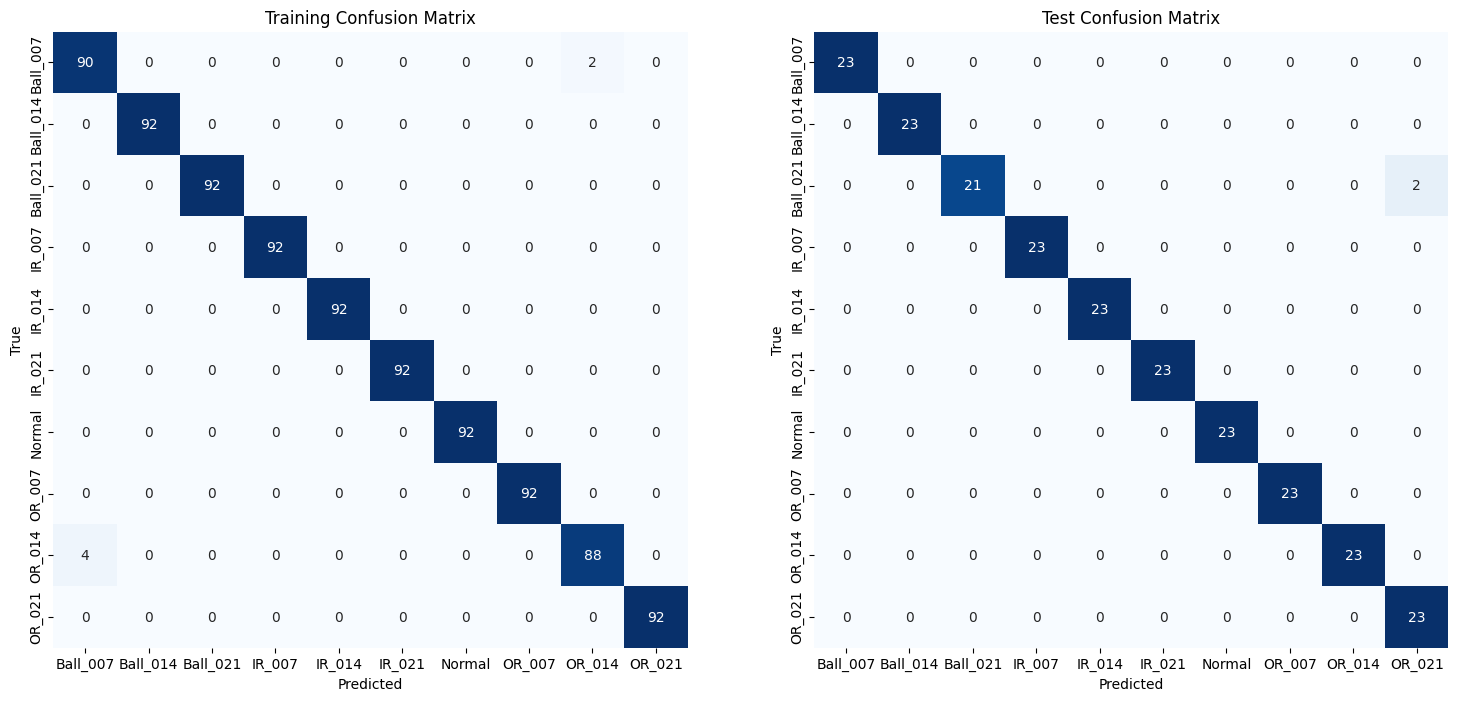

In [6]:
fault_type = _
plt.figure(1,figsize=(18,8))
plt.subplot(121)
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.subplot(122)
sns.heatmap(test_confu_matrix, annot = True,
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [7]:
# 使用最佳模型來預測測試集
y_pred = tuned_svm_clf.best_estimator_.predict(test_data_scaled)
# 計算準確率
test_accuracy = accuracy_score(test_data['fault'], y_pred)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.991304347826087
